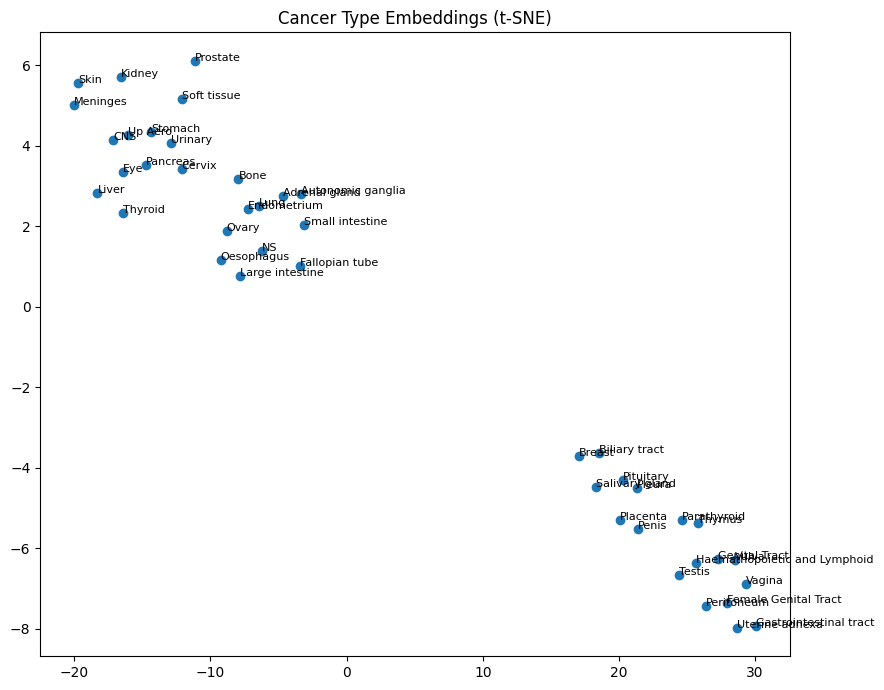

/Users/yifandou/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


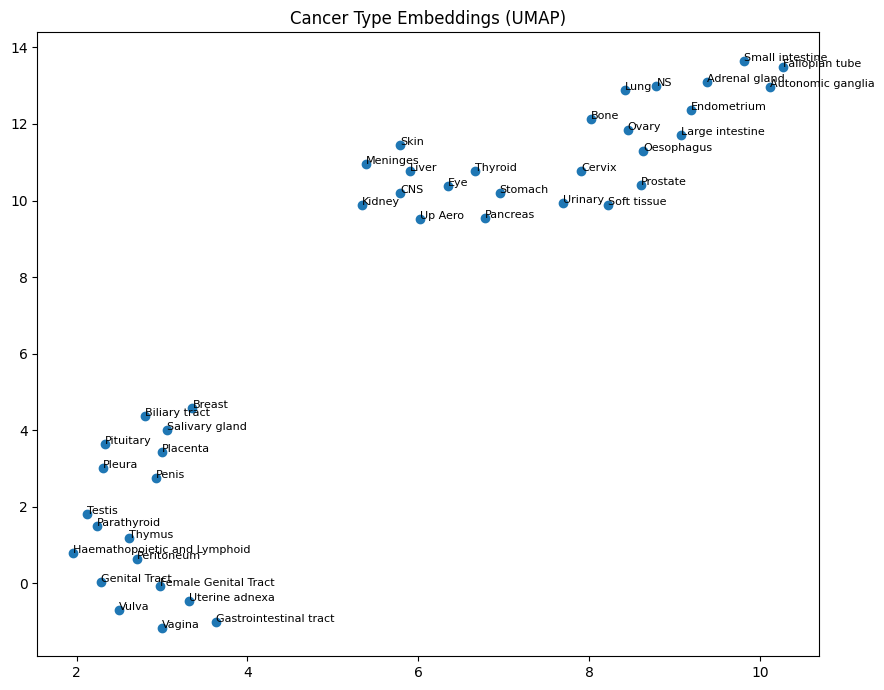


Silhouette Score for k=2 clusters on UMAP: 0.771
Silhouette Score for k=2 clusters on original embeddings: 0.638


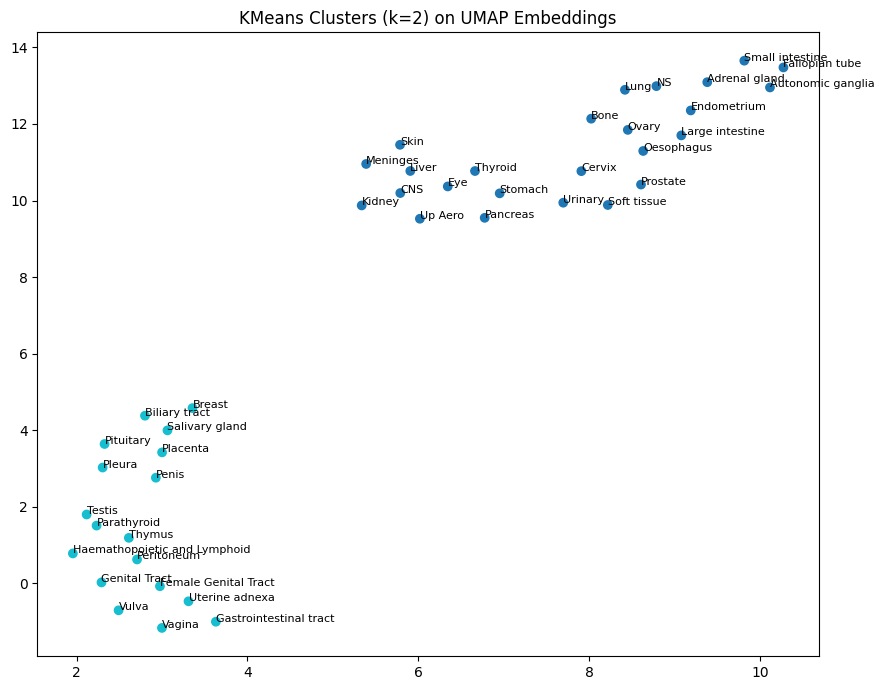


Davies-Bouldin Index (UMAP embeddings): 0.329 (lower is better)
Calinski-Harabasz Index (UMAP embeddings): 310.816 (higher is better)

Davies-Bouldin Index (original embeddings): 0.464
Calinski-Harabasz Index (original embeddings): 100.756

Cancer Types in Each KMeans Cluster (k=2):

Cluster 1 (25 cancers):
  Adrenal gland
  Autonomic ganglia
  Bone
  CNS
  Cervix
  Endometrium
  Eye
  Fallopian tube
  Kidney
  Large intestine
  Liver
  Lung
  Meninges
  NS
  Oesophagus
  Ovary
  Pancreas
  Prostate
  Skin
  Small intestine
  Soft tissue
  Stomach
  Thyroid
  Up Aero
  Urinary

Cluster 2 (18 cancers):
  Biliary tract
  Breast
  Female Genital Tract
  Gastrointestinal tract
  Genital Tract
  Haemathopoietic and Lymphoid
  Parathyroid
  Penis
  Peritoneum
  Pituitary
  Placenta
  Pleura
  Salivary gland
  Testis
  Thymus
  Uterine adnexa
  Vagina
  Vulva


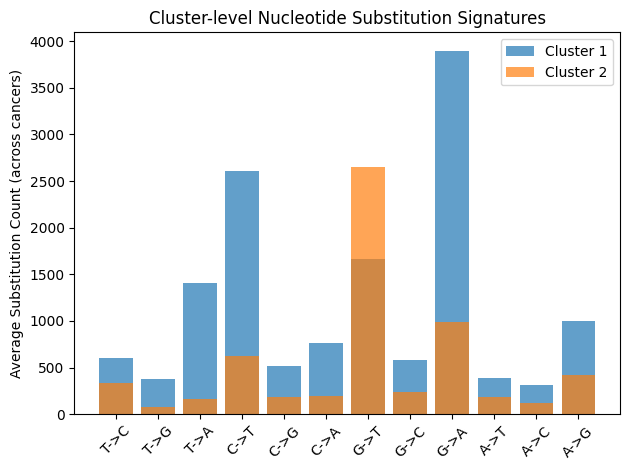

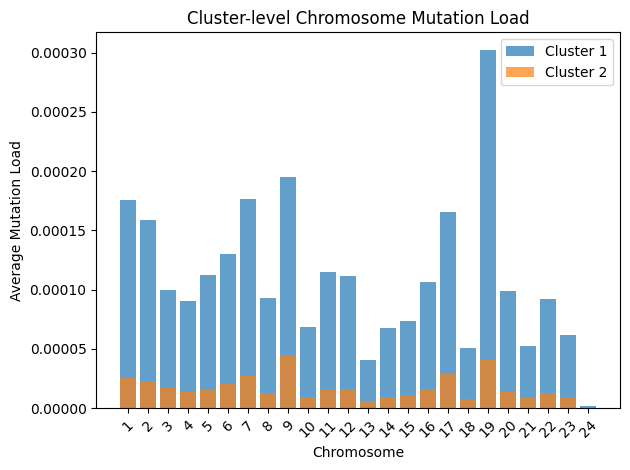

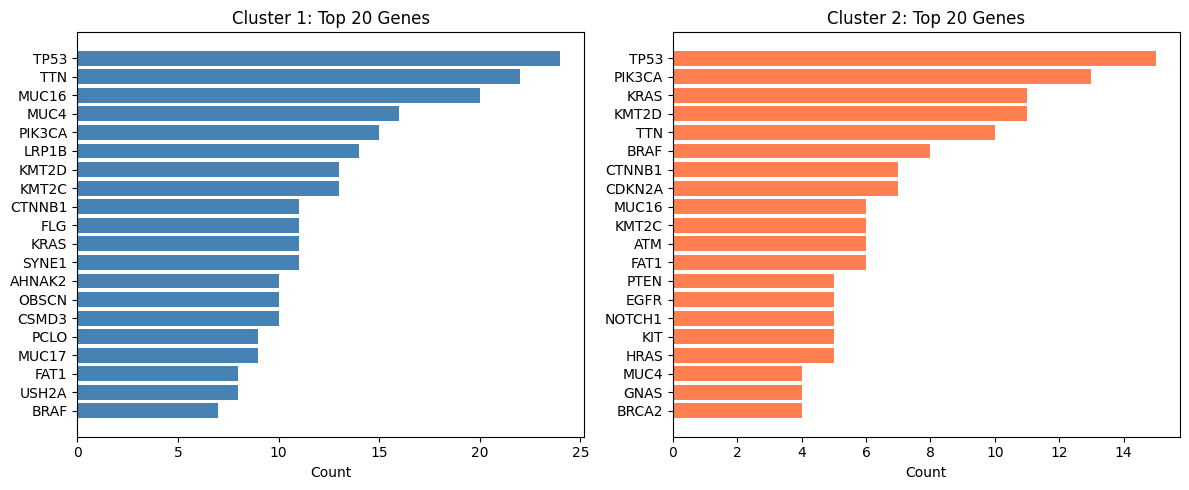


Genes common to both clusters: ['ABCA13', 'AHNAK2', 'ANK3', 'ANKRD36C', 'APC', 'AR', 'ARID1A', 'ARID1B', 'ATM', 'ATR', 'ATRX', 'BAP1', 'BRAF', 'BRCA1', 'BRCA2', 'CDKN2A', 'CHEK2', 'CMYA5', 'CREBBP', 'CSMD1', 'CSMD3', 'CTNNB1', 'CYLD', 'DCC', 'DICER1', 'DMD', 'DNAH2', 'EGFR', 'EIF1AX', 'EP300', 'ERBB2', 'ERBB3', 'ERBB4', 'FAT1', 'FAT3', 'FAT4', 'FBXW7', 'FGFR3', 'FLG', 'GLI3', 'GNA11', 'GNAS', 'GTF2I', 'HLA-A', 'HMCN1', 'HNRNPCL1', 'HRAS', 'IDH1', 'IDH2', 'KCNJ12', 'KDM6A', 'KIT', 'KMT2A', 'KMT2C', 'KMT2D', 'KRAS', 'LRP1B', 'MACF1', 'MED12', 'MEN1', 'MET', 'MSH6', 'MTOR', 'MUC12', 'MUC16', 'MUC17', 'MUC4', 'MUC5B', 'MUC6', 'NBPF1', 'NEB', 'NF1', 'NFE2L2', 'NOTCH1', 'NOTCH2', 'NRAS', 'OBSCN', 'PABPC1', 'PBRM1', 'PCLO', 'PIK3CA', 'POLE', 'PPP2R1A', 'PRAMEF10', 'PRKDC', 'PTCH1', 'PTEN', 'PTPN11', 'PTPRD', 'PTPRT', 'RET', 'RYR2', 'RYR3', 'SETD2', 'SF3B1', 'SMAD4', 'SMARCA4', 'SYNE1', 'TAS2R30', 'TET2', 'TP53', 'TSC2', 'TTN', 'USH2A', 'WT1', 'ZFHX3', 'ZFHX4']

Genes unique to Cluster 1: ['A

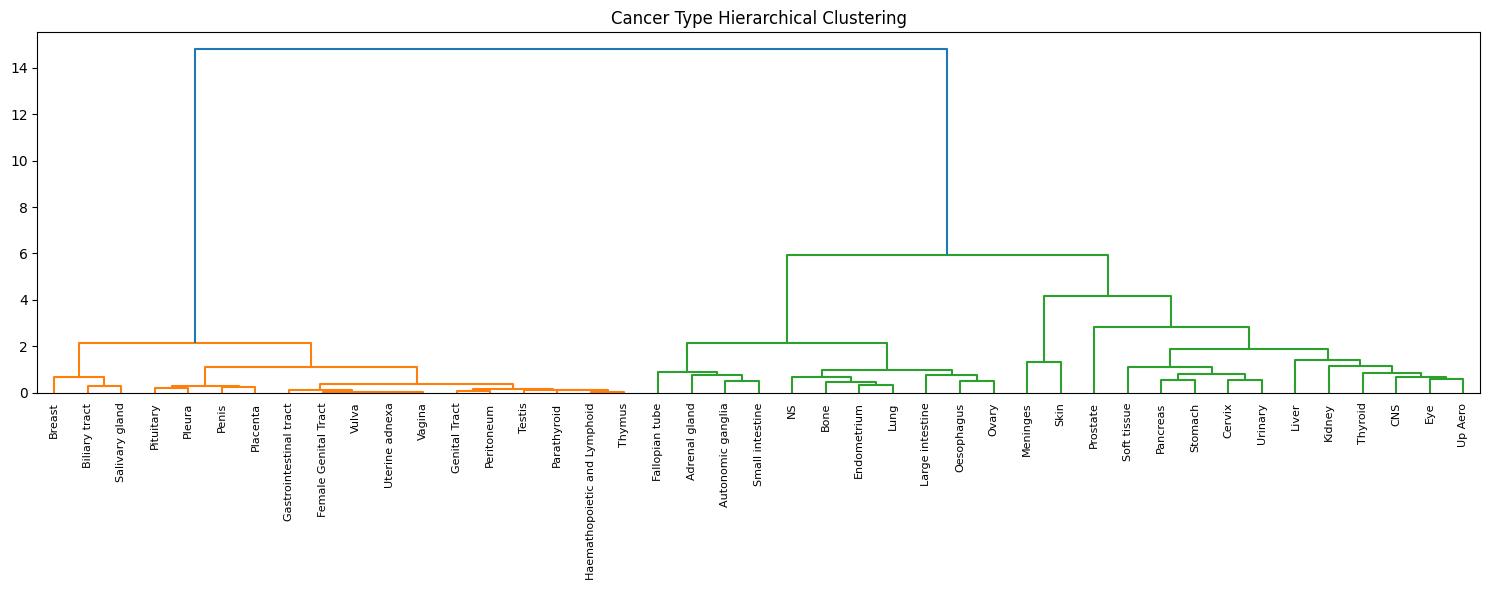


Nearest Neighbors for Each Cancer Type:
Adrenal gland            : ['NS', 'Lung', 'Endometrium']
Autonomic ganglia        : ['Small intestine', 'Fallopian tube', 'Adrenal gland']
Biliary tract            : ['Salivary gland', 'Placenta', 'Pituitary']
Bone                     : ['Endometrium', 'Oesophagus', 'Lung']
Breast                   : ['Biliary tract', 'Salivary gland', 'Placenta']
CNS                      : ['Up Aero', 'Eye', 'Thyroid']
Cervix                   : ['Soft tissue', 'Prostate', 'Urinary']
Endometrium              : ['Lung', 'Oesophagus', 'Bone']
Eye                      : ['Thyroid', 'Up Aero', 'Pancreas']
Fallopian tube           : ['Autonomic ganglia', 'Small intestine', 'NS']
Female Genital Tract     : ['Uterine adnexa', 'Vulva', 'Vagina']
Gastrointestinal tract   : ['Vagina', 'Uterine adnexa', 'Vulva']
Genital Tract            : ['Vulva', 'Female Genital Tract', 'Uterine adnexa']
Haemathopoietic and Lymphoid: ['Thymus', 'Peritoneum', 'Genital Tract']
Kidney     

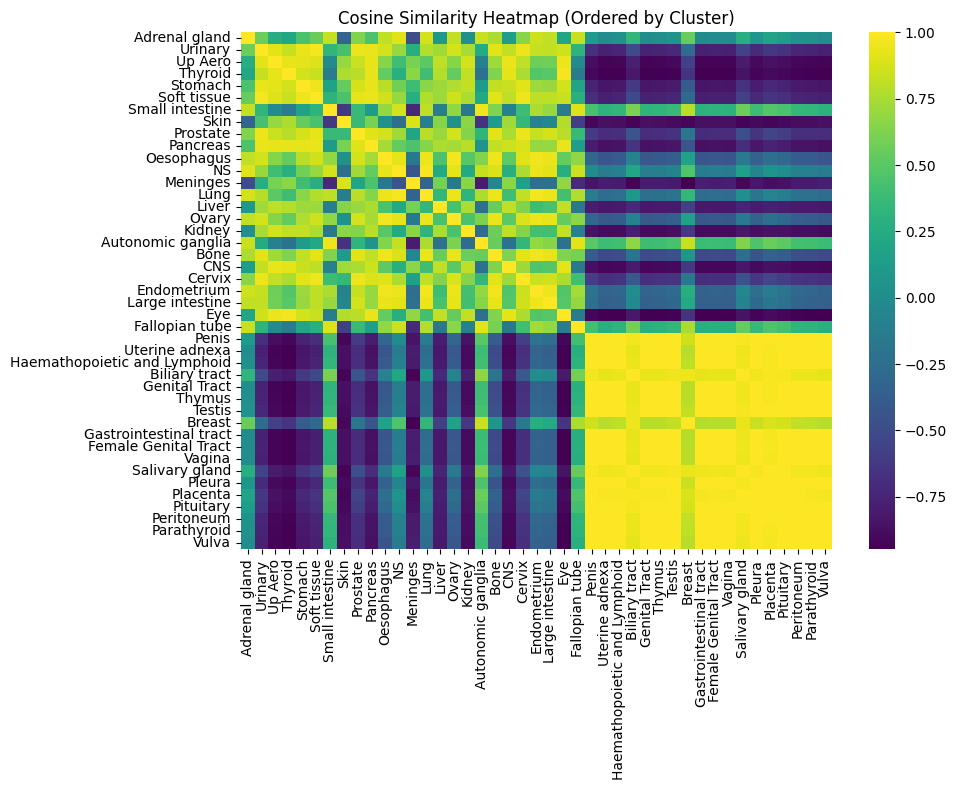

In [3]:
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd


# Which embedding file to use (e.g., TabNet, nmf, etc.)
EMBED_FILE = "cancer_embeddings_tabnet_proj.npy"  # or "cancer_embeddings_mlp.npy", etc.
#EMBED_FILE ="cancer_embeddings_mlp.npy"
#EMBED_FILE ="mlp_contrastive_embeddings.npy"
#EMBED_FILE ="cancer_embeddings_nmf.npy"
#EMBED_FILE ="cancer_embeddings_autoencoder.npy"
#EMBED_FILE ="cancer_embeddings_simclr.npy"
#EMBED_FILE ="cancer_embeddings_deepcluster.npy"
#EMBED_FILE ="hierarchical_cosine_similarity"


# The list of cancer type names, in the order of your embeddings
cancers = [
    "Adrenal gland", "Autonomic ganglia", "Biliary tract", "Bone", 
    "Breast", "CNS", "Cervix","Endometrium",
    "Eye", "Fallopian tube", "Female Genital Tract","Gastrointestinal tract",
    "Genital Tract", "Haemathopoietic and Lymphoid", "Kidney", "Large intestine", 
    "Liver", "Lung", "Meninges", "NS", 
    "Oesophagus","Ovary", "Pancreas", "Parathyroid", 
    "Penis", "Peritoneum", "Pituitary", "Placenta", 
    "Pleura","Prostate", "Salivary gland", "Skin", 
    "Small intestine", "Soft tissue","Stomach", "Testis", 
    "Thymus", "Thyroid", "Up Aero", "Urinary",
    "Uterine adnexa", "Vagina", "Vulva"
]


# 1. Load embeddings
embeds = np.load(EMBED_FILE)
assert len(embeds) == len(cancers), f"Number of embeddings {len(embeds)} doesn't match number of cancer names {len(cancers)}"

# 2. Dimensionality Reduction (t-SNE)
tsne = TSNE(n_components=2, perplexity=8, random_state=42)
embeds_2d = tsne.fit_transform(embeds)

plt.figure(figsize=(9, 7))
plt.scatter(embeds_2d[:,0], embeds_2d[:,1])
for i, label in enumerate(cancers):
    plt.text(embeds_2d[i,0], embeds_2d[i,1], label, fontsize=8)
plt.title('Cancer Type Embeddings (t-SNE)')
plt.tight_layout()
plt.show()

# 3. UMAP
umap_embeds = umap.UMAP(n_neighbors=8, min_dist=0.5, random_state=42).fit_transform(embeds)
plt.figure(figsize=(9, 7))
plt.scatter(umap_embeds[:,0], umap_embeds[:,1])
for i, label in enumerate(cancers):
    plt.text(umap_embeds[i,0], umap_embeds[i,1], label, fontsize=8)
plt.title('Cancer Type Embeddings (UMAP)')
plt.tight_layout()
plt.show()

# 4. KMeans clustering on UMAP
n_clusters = 2  # You can try different numbers here
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(umap_embeds)
plt.figure(figsize=(9,7))
plt.scatter(umap_embeds[:,0], umap_embeds[:,1], c=cluster_labels, cmap='tab10')
for i, label in enumerate(cancers):
    plt.text(umap_embeds[i,0], umap_embeds[i,1], label, fontsize=8)

from sklearn.metrics import silhouette_score
sil_score_umap = silhouette_score(umap_embeds, cluster_labels)
print(f"\nSilhouette Score for k={n_clusters} clusters on UMAP: {sil_score_umap:.3f}")
sil_score_orig = silhouette_score(embeds, cluster_labels)
print(f"Silhouette Score for k={n_clusters} clusters on original embeddings: {sil_score_orig:.3f}")

plt.title(f'KMeans Clusters (k={n_clusters}) on UMAP Embeddings')
plt.tight_layout()
plt.show()


from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# DBI (lower is better) and CHI (higher is better) on UMAP embeddings
dbi_umap = davies_bouldin_score(umap_embeds, cluster_labels)
chi_umap = calinski_harabasz_score(umap_embeds, cluster_labels)
print(f"\nDavies-Bouldin Index (UMAP embeddings): {dbi_umap:.3f} (lower is better)")
print(f"Calinski-Harabasz Index (UMAP embeddings): {chi_umap:.3f} (higher is better)")

# Optionally: Do the same on original embeddings
dbi_orig = davies_bouldin_score(embeds, cluster_labels)
chi_orig = calinski_harabasz_score(embeds, cluster_labels)
print(f"\nDavies-Bouldin Index (original embeddings): {dbi_orig:.3f}")
print(f"Calinski-Harabasz Index (original embeddings): {chi_orig:.3f}")


# ==== Cluster Membership Reporting ====
print("\nCancer Types in Each KMeans Cluster (k=2):")
for cluster_id in range(n_clusters):
    members = [cancers[i] for i in range(len(cancers)) if cluster_labels[i] == cluster_id]
    print(f"\nCluster {cluster_id + 1} ({len(members)} cancers):")
    for name in members:
        print(f"  {name}")


gene_xl = pd.ExcelFile('gene1_count.xlsx')
all_gene_signatures = []
for i in range(len(cancers)):
    df = gene_xl.parse(i).select_dtypes(include='number')
    # Sum across all genes for each substitution type, so vector of 12
    sig = df.sum(axis=0).values
    all_gene_signatures.append(sig)
all_gene_signatures = np.stack(all_gene_signatures)  # shape: (n_cancer, 12)

# Calculate cluster-level average signatures
for cluster_id in np.unique(cluster_labels):
    idx = np.where(cluster_labels == cluster_id)[0]
    cluster_sig = all_gene_signatures[idx].mean(axis=0)
    plt.bar(range(12), cluster_sig, alpha=0.7, label=f'Cluster {cluster_id+1}')
plt.xticks(range(12), df.columns, rotation=45)
plt.ylabel('Average Substitution Count (across cancers)')
plt.title('Cluster-level Nucleotide Substitution Signatures')
plt.legend()
plt.tight_layout()
plt.show()



# Load the per-cancer, per-chromosome counts
chrom_xl = pd.ExcelFile('chrom1_count.xlsx')
all_chrom_loads = []
for i in range(len(cancers)):
    df = chrom_xl.parse(i).select_dtypes(include='number')
    # Sum across all substitution types per chromosome
    chrom_load = df.sum(axis=1).values
    all_chrom_loads.append(chrom_load)
all_chrom_loads = np.stack(all_chrom_loads)  # shape: (n_cancer, n_chrom)

# Compute and plot the overlaid bar chart
n_chrom = all_chrom_loads.shape[1]
# make labels "1", "2", ..., str(n_chrom)
chrom_labels = [str(i+1) for i in range(n_chrom)]

for cluster_id in np.unique(cluster_labels):
    idx = np.where(cluster_labels == cluster_id)[0]
    cluster_chrom = all_chrom_loads[idx].mean(axis=0)
    plt.bar(np.arange(1, n_chrom+1), cluster_chrom, alpha=0.7, label=f'Cluster {cluster_id+1}')

plt.xticks(np.arange(1, n_chrom+1), chrom_labels, rotation=45)
plt.xlabel('Chromosome')
plt.ylabel('Average Mutation Load')
plt.title('Cluster-level Chromosome Mutation Load')
plt.legend()
plt.tight_layout()
plt.show()



from collections import Counter
import matplotlib.pyplot as plt

# --- Aggregate mutated genes for each cluster ---
cluster_gene_lists = {0: [], 1: []}
for cid in [0, 1]:
    for i in range(len(cancers)):
        if cluster_labels[i] == cid:
            df = gene_xl.parse(i)
            genes = df.iloc[:, 0].astype(str).tolist()
            cluster_gene_lists[cid].extend(genes)

# --- Count frequencies ---
counter0 = Counter(cluster_gene_lists[0])
counter1 = Counter(cluster_gene_lists[1])

# --- Pick top N for each cluster independently ---
topN = 20
top0 = counter0.most_common(topN)
top1 = counter1.most_common(topN)

# --- Unzip into plotting lists ---
genes0, counts0 = zip(*top0)
genes1, counts1 = zip(*top1)

# --- Plot them side by side ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Cluster 0
axes[0].barh(genes0, counts0, color='steelblue')
axes[0].invert_yaxis()
axes[0].set_title(f"Cluster 1: Top {topN} Genes")
axes[0].set_xlabel("Count")

# Cluster 1
axes[1].barh(genes1, counts1, color='coral')
axes[1].invert_yaxis()
axes[1].set_title(f"Cluster 2: Top {topN} Genes")
axes[1].set_xlabel("Count")

plt.tight_layout()
plt.show()


# --- Gene set overlap/distinction ---
set0 = set(cluster_gene_lists[0])
set1 = set(cluster_gene_lists[1])
shared_genes = set0 & set1
unique0 = set0 - set1
unique1 = set1 - set0

print("\nGenes common to both clusters:", sorted(shared_genes))
print("\nGenes unique to Cluster 1:", sorted(unique0))
print("\nGenes unique to Cluster 2:", sorted(unique1))

# Optional Venn diagram (install matplotlib-venn if needed)
try:
    from matplotlib_venn import venn2
    plt.figure(figsize=(6,6))
    venn2([set0, set1], set_labels=('Cluster 1', 'Cluster 2'))
    plt.title("Overlap of Top Mutated Genes Between Clusters")
    plt.show()
except ImportError:
    print("Install matplotlib-venn for Venn diagram.")

################################################################

from sklearn.metrics.pairwise import cosine_similarity

for cid in np.unique(cluster_labels):
    idx = np.where(cluster_labels == cid)[0]
    # All pairwise similarities within cluster
    sim_mat = cosine_similarity(embeds)
    within = sim_mat[np.ix_(idx, idx)]
    # Exclude diagonal (self-similarity)
    within_vals = within[np.triu_indices_from(within, k=1)]
    print(f'Cluster {cid+1}: Mean within-cluster similarity = {within_vals.mean():.3f}')
    
# Between-cluster similarity
for cid1 in np.unique(cluster_labels):
    for cid2 in np.unique(cluster_labels):
        if cid1 < cid2:
            idx1 = np.where(cluster_labels == cid1)[0]
            idx2 = np.where(cluster_labels == cid2)[0]
            between = sim_mat[np.ix_(idx1, idx2)]
            print(f'Between Cluster {cid1+1} and Cluster {cid2+1}: Mean similarity = {between.mean():.3f}')




#Find the most representative (closest to cluster centroid) cancer in each cluste
for cid in np.unique(cluster_labels):
    idx = np.where(cluster_labels == cid)[0]
    centroid = embeds[idx].mean(axis=0)
    dists = np.linalg.norm(embeds[idx] - centroid, axis=1)
    best = idx[np.argmin(dists)]
    print(f"Prototype for Cluster {cid+1}: {cancers[best]}")



# 5. Hierarchical clustering dendrogram
linked = linkage(embeds, 'ward')
plt.figure(figsize=(15, 6))
dendrogram(linked, labels=cancers, leaf_rotation=90)
plt.title('Cancer Type Hierarchical Clustering')
plt.tight_layout()
plt.show()

# 6. Similarity/Distance Analysis (top 3 neighbors)

print("\nNearest Neighbors for Each Cancer Type:")
for i, name in enumerate(cancers):
    sims = sim_mat[i]
    top3 = np.argsort(-sims)[1:4]  # skip self
    print(f"{name:25}: {[cancers[j] for j in top3]}")


#Hierarchical Clustering Heatmap
#Show a heatmap of pairwise cosine similarities, ordered by cluster, for visual confirmation.
import seaborn as sns

# Order embeddings by cluster for heatmap
order = np.argsort(cluster_labels)
ordered_sim = sim_mat[order][:,order]
plt.figure(figsize=(10, 8))
sns.heatmap(ordered_sim, xticklabels=np.array(cancers)[order], yticklabels=np.array(cancers)[order], cmap='viridis')
plt.title('Cosine Similarity Heatmap (Ordered by Cluster)')
plt.tight_layout()
plt.show()